# Assignment 1

## Loading data

In [1]:
from aa import DataLoader
from aa import extract_features
from aa import check_output

In [2]:
# IN THIS BOX YOU ARE ALLOWED TO ADD ANY CODE FOR SETTING UP A PYTORCH DEVICE

In [2]:
dataset = DataLoader(data_dir="/home/guserbto@GU.GU.SE/lt2316-h20-aa/DDICorpus", device='cuda:1')

/usr/local/lib64/python3.7/site-packages/pandas/core/generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [3]:
dataset.data_df.head()

,sentence_id,token_id,char_start_id,char_end_id,split
0,DDI-DrugBank.d610.s0,1.0,0.0,14.0,Test
1,DDI-DrugBank.d610.s0,2.0,16.0,25.0,Test
2,DDI-DrugBank.d610.s0,3.0,27.0,28.0,Test
3,DDI-DrugBank.d610.s0,4.0,30.0,37.0,Test
4,DDI-DrugBank.d610.s0,5.0,39.0,42.0,Test


In [4]:
dataset.ner_df.head()

,sentence_id,ner_id,char_start_id,char_end_id
0,DDI-DrugBank.d610.s0,3,30,37
1,DDI-DrugBank.d610.s0,3,82,91
2,DDI-DrugBank.d610.s0,3,96,105
3,DDI-DrugBank.d610.s0,3,129,138
4,DDI-DrugBank.d610.s0,3,144,153


In [5]:
dataset.vocab[:15]

['Pharmacokinetic',
 'properties',
 'of',
 'abacavir',
 'were',
 'not',
 'altered',
 'by',
 'the',
 'addition',
 'either',
 'lamivudine',
 'or',
 'zidovudine',
 'combination']

In [6]:
dataset.id2ner

{0: 'none', 1: 'group', 2: 'drug_n', 3: 'drug', 4: 'brand'}

In [7]:
dataset.max_sample_length

165

In [10]:
dataset.get_random_sample()

'Our objective was to establish potential effects of DRUG:calcium on absorption of DRUG:nonheme and DRUG:heme DRUG:iron DRUG:iron and the dose response for this effect in the absence of a meal .'

### Data Exploration

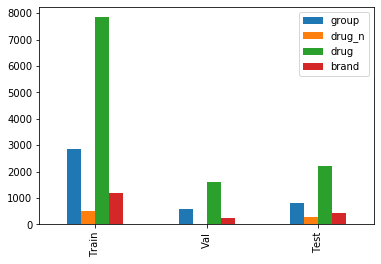

In [4]:
dataset.plot_split_ner_distribution()

### Labels

In [ ]:
train_y, val_y, test_y = check_output(dataset.get_y())

Unique sent in Train:  5870
Unique sent in Val:  1035
Unique sent in Test:  665
labeling...
Train labeled sent: 5870
labeling...


## Extracting Features

In [3]:
train_X, val_X, test_X = check_output(extract_features(
                                                        data=dataset.data_df,
                                                        max_sample_length=dataset.max_sample_length,
                                                        sample_length_dict=dataset.sample_length_dict,
                                                        id2word=dataset.id2word,
                                                       ))

extracting features
Unique sent in Train:  5870
Unique sent in Val:  1035
Unique sent in Test:  1964
val embeddings: 1035
test embeddings: 1964
train embeddings: 5870
id2pos:  {1: 'NN', 2: ':', 3: 'IN', 4: 'NNS', 5: 'CC', 6: 'DT', 7: 'VBN', 8: '.', 9: 'NNP', 10: 'JJ', 11: 'VBZ', 12: 'RB', 13: 'TO', 14: 'PRP$', 15: ',', 16: 'MD', 17: 'VB', 18: 'VBD', 19: 'VBG', 20: 'VBP', 21: 'WDT', 22: 'CD', 23: '(', 24: ')', 25: 'EX', 26: 'JJS', 27: 'WP', 28: 'JJR', 29: 'FW', 30: '#', 31: 'PRP', 32: '$', 33: 'WRB', 34: 'POS', 35: 'RBR', 36: 'UH', 37: 'RP', 38: 'WP$', 39: 'NNPS', 40: 'PDT', 41: 'LS', 42: 'RBS', 43: '``', 44: "''"}


## Bonus Part: Explore Some more

In [ ]:
#uncomment the code below if you want to do bonus part

In [11]:
dataset.plot_ner_per_sample_distribution()

In [ ]:
#dataset.plot_sample_length_distribution()

In [ ]:
#dataset.plot_ner_cooccurence_venndiagram()